In [1]:
import sys
sys.path.append('..')
from core import *

In [2]:
ramans = ramanfrom('../muestras/ogompa')

In [3]:
raman = ramans.ramans[0]
raman.interactive(mod=True)

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

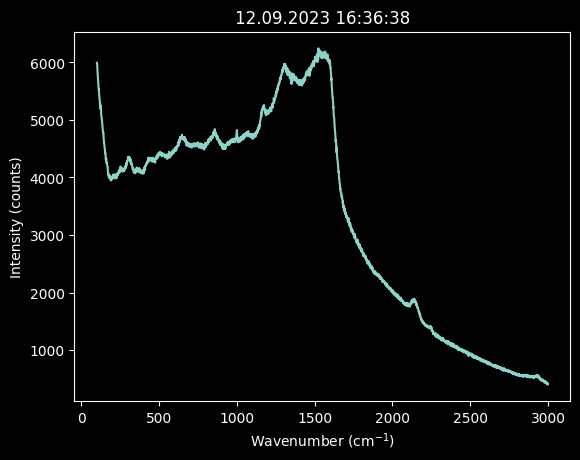

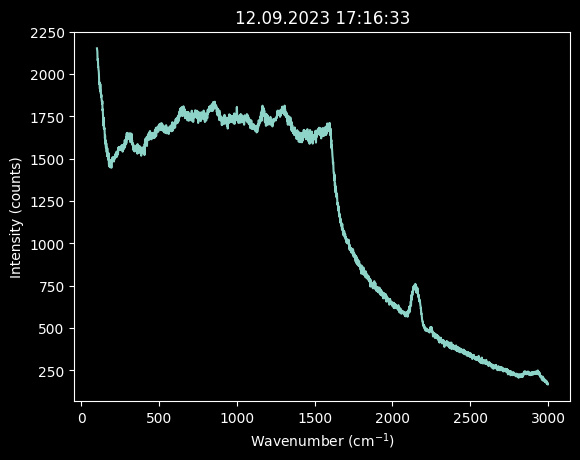

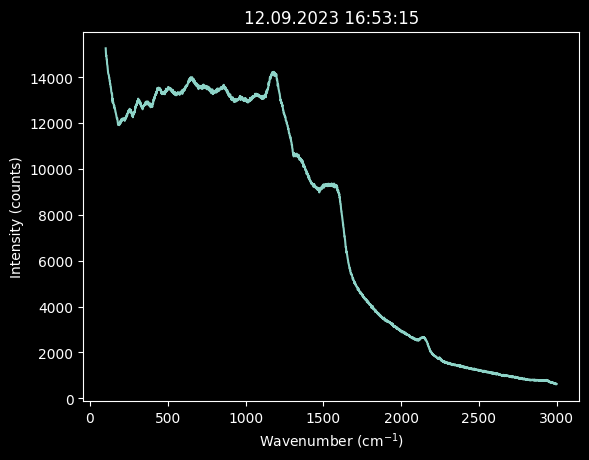

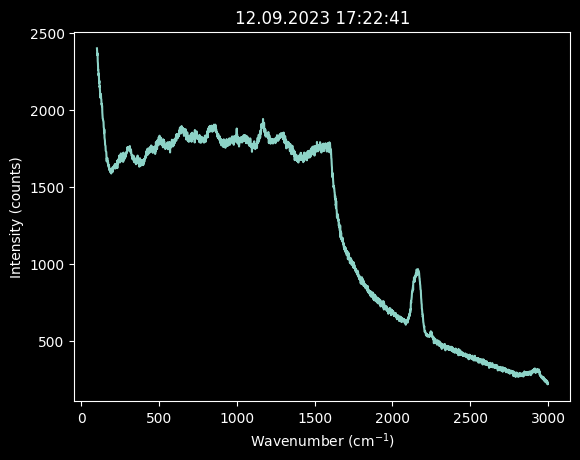

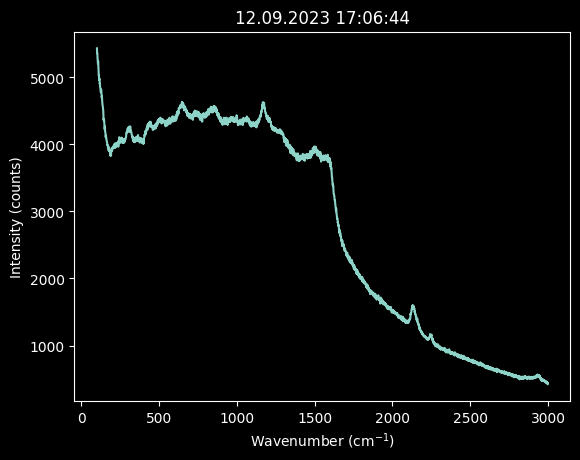

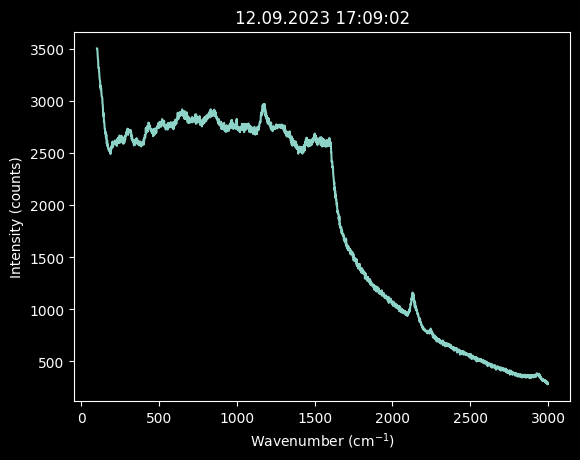

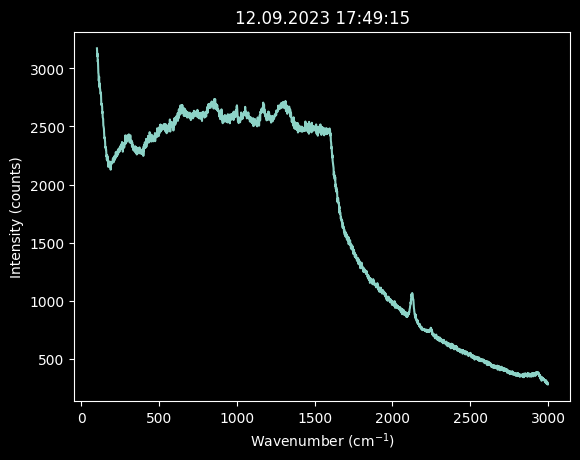

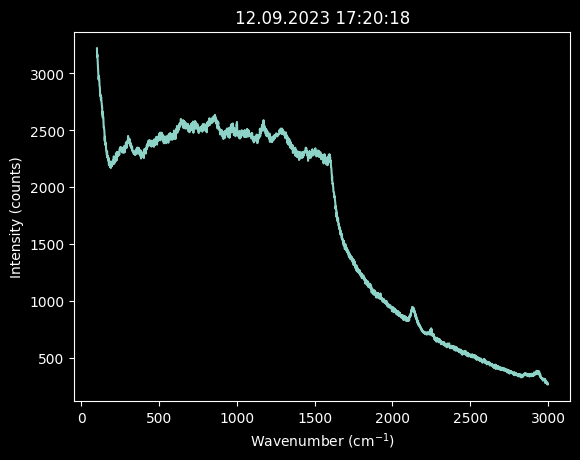

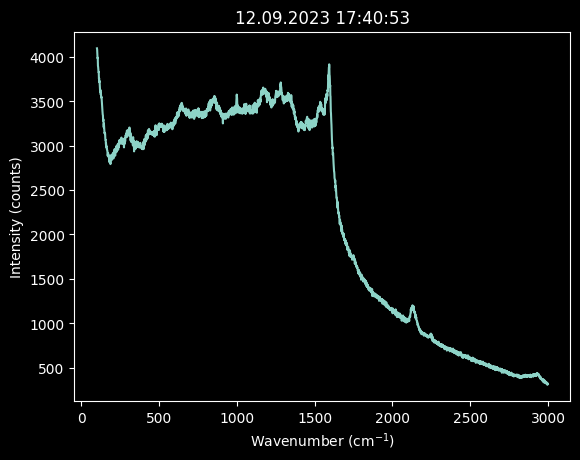

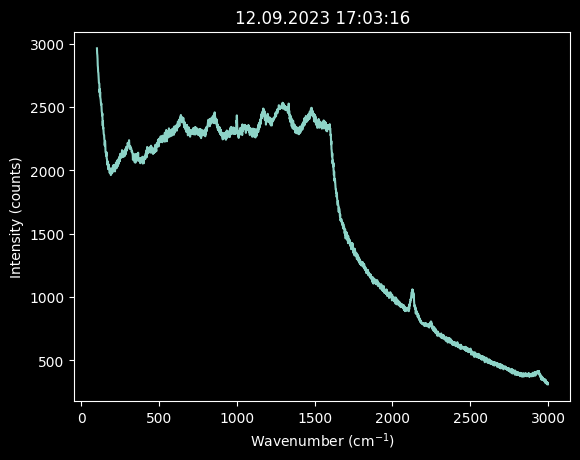

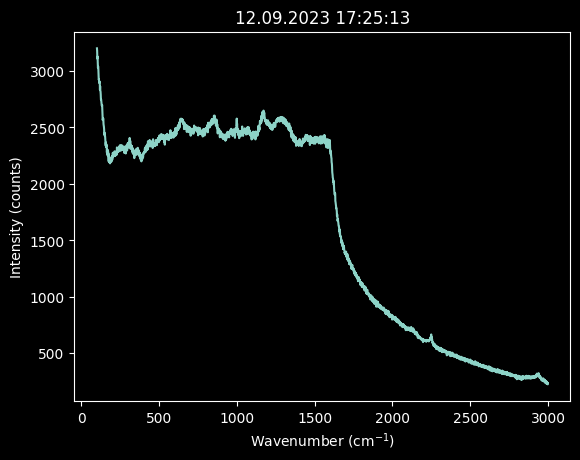

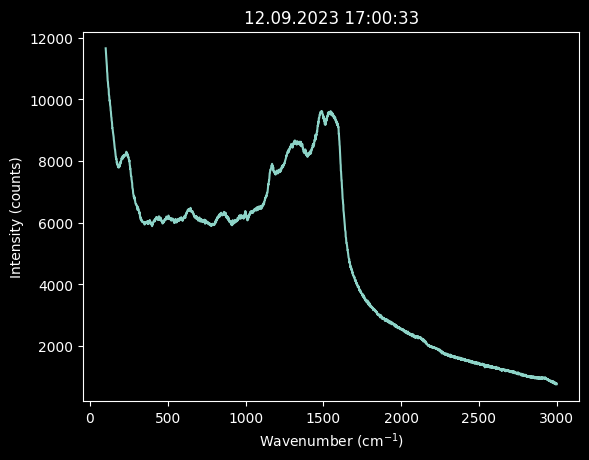

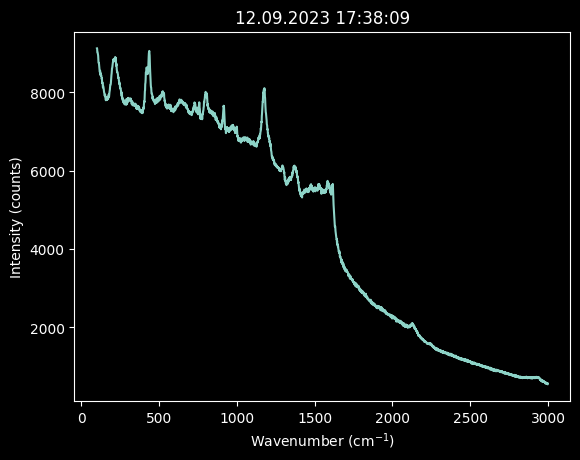

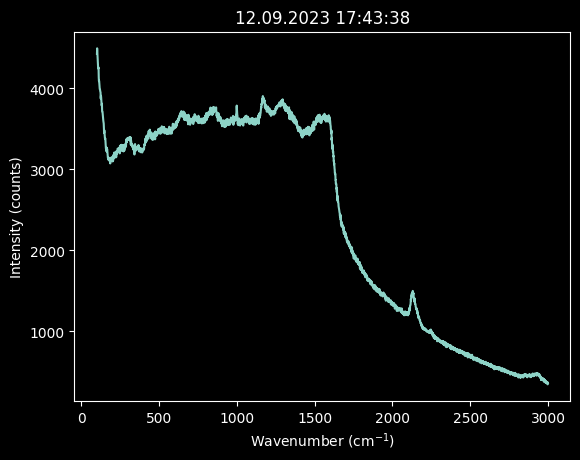

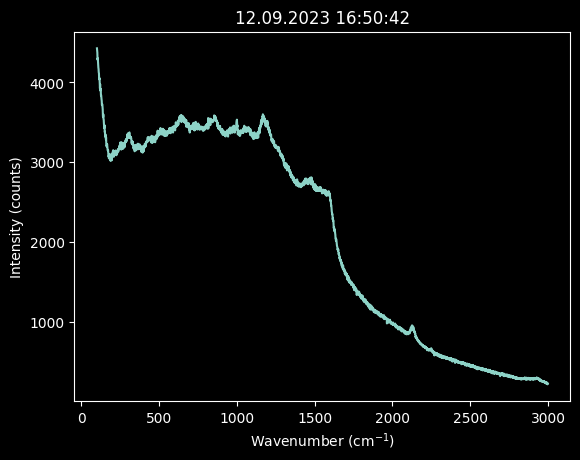

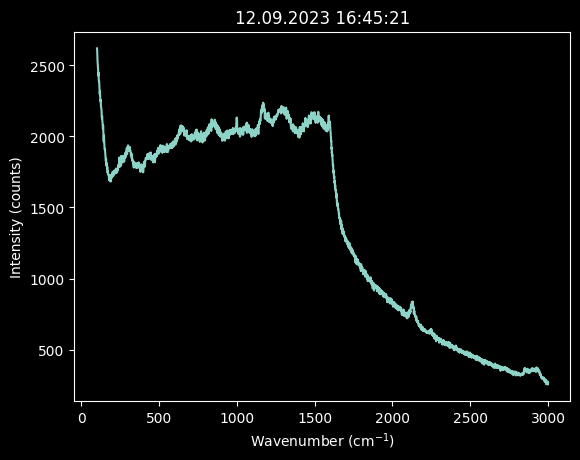

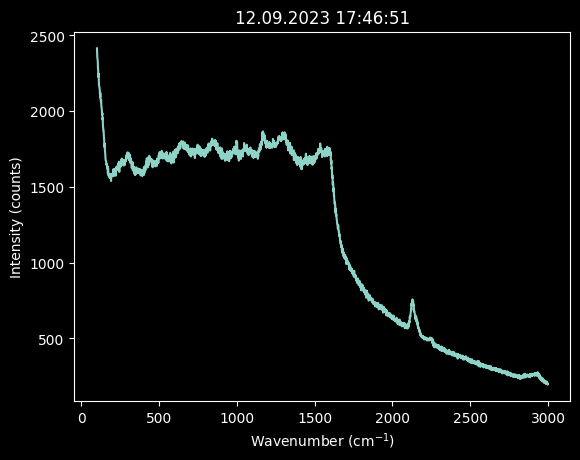

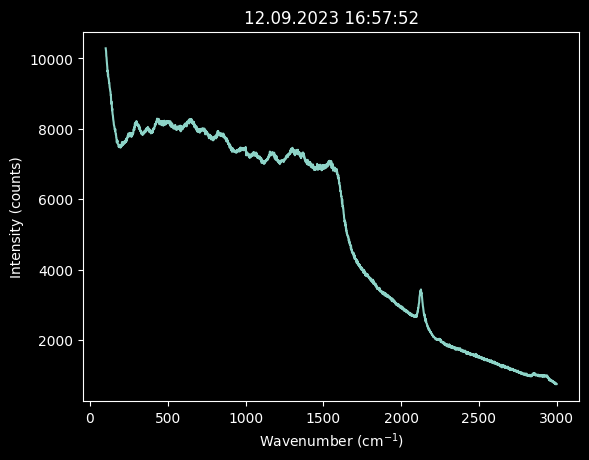

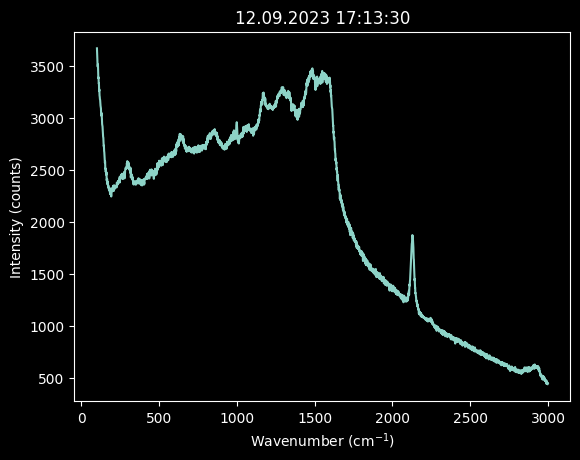

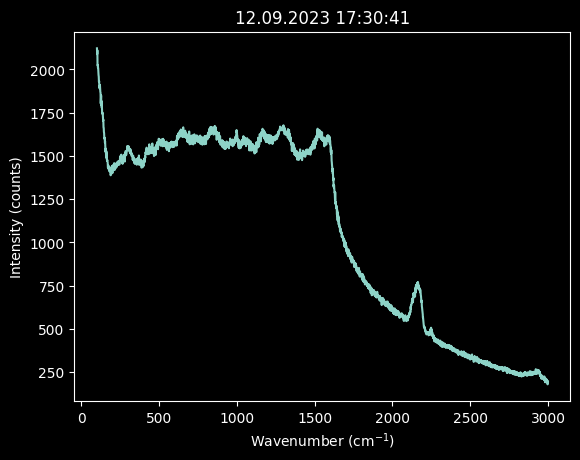

<Figure size 640x480 with 0 Axes>

In [4]:
for e in ramans.ramanspecs.values():
    e.plot()

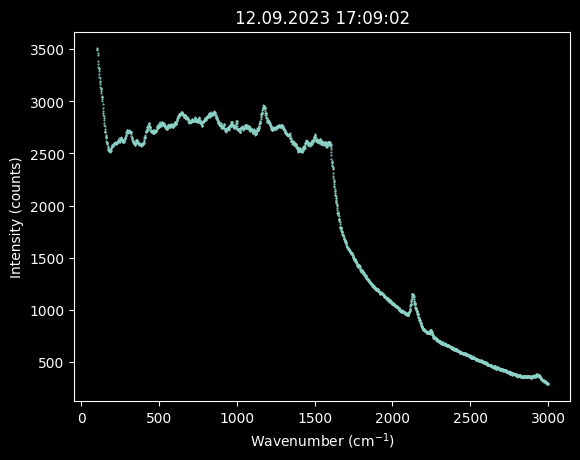

<Figure size 640x480 with 0 Axes>

In [5]:
ramans.ramanspecs['12.09.2023 17:09:02'].sav_gol(window=10,order=5)

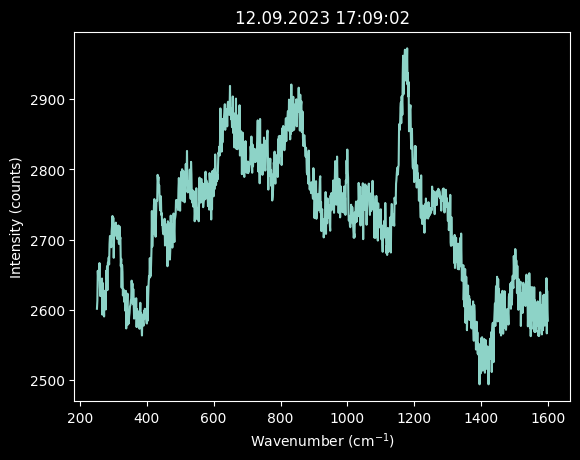

<Figure size 640x480 with 0 Axes>

In [12]:
ramans.ramanspecs['12.09.2023 17:09:02'].crop(250,1600,show=True)

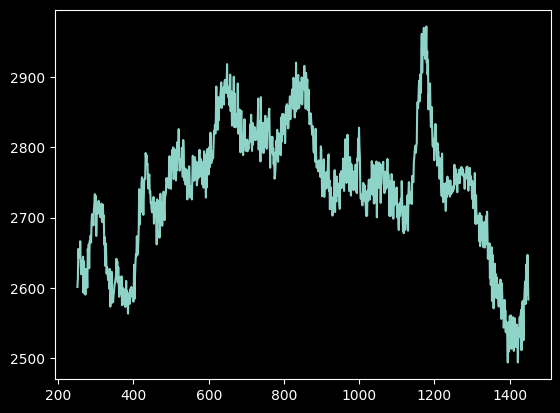

In [7]:
nx = ramans.ramanspecs['12.09.2023 17:09:02'].croppedx
ny = ramans.ramanspecs['12.09.2023 17:09:02'].croppedy

plt.plot(nx,ny)

In [ ]:
for e in ramans.ramanspecs.values():
    e.baseline(0, 1000, 0, 0, show=False)

In [101]:
ramans.ramanspecs

{'12.09.2023 16:36:38': RamanSpectrum (repr): ../muestras/ogompa/nsno_01.txt,
 '12.09.2023 17:16:33': RamanSpectrum (repr): ../muestras/ogompa/nsno_11.txt,
 '12.09.2023 16:53:15': RamanSpectrum (repr): ../muestras/ogompa/nsno_04.txt,
 '12.09.2023 17:22:41': RamanSpectrum (repr): ../muestras/ogompa/nsno_13.txt,
 '12.09.2023 17:06:44': RamanSpectrum (repr): ../muestras/ogompa/nsno_08.txt,
 '12.09.2023 17:09:02': RamanSpectrum (repr): ../muestras/ogompa/nsno_09.txt,
 '12.09.2023 17:49:15': RamanSpectrum (repr): ../muestras/ogompa/nsno_20.txt,
 '12.09.2023 17:20:18': RamanSpectrum (repr): ../muestras/ogompa/nsno_12.txt,
 '12.09.2023 17:40:53': RamanSpectrum (repr): ../muestras/ogompa/nsno_17.txt,
 '12.09.2023 17:03:16': RamanSpectrum (repr): ../muestras/ogompa/nsno_07.txt,
 '12.09.2023 17:25:13': RamanSpectrum (repr): ../muestras/ogompa/nsno_14.txt,
 '12.09.2023 17:00:33': RamanSpectrum (repr): ../muestras/ogompa/nsno_06.txt,
 '12.09.2023 17:38:09': RamanSpectrum (repr): ../muestras/ogompa

In [73]:
ramans.ramanspecs.pop('12.09.2023 16:50:42')

RamanSpectrum (repr): ../muestras/ogompa/nsno_03.txt

In [79]:
for e in ramans.ramanspecs.values():
    e.bas

13

In [80]:
len(ramans.ramans)

20

In [76]:
# for wavelet in pywt.wavelist():
#     try:
#         coef, freqs=pywt.cwt(test_raman.croppedy,np.arange(1,200),wavelet)
#         # Plot the scalogram
#         plt.figure(figsize=(20,6))
#         plt.imshow(coef, aspect='auto',vmax=abs(coef).max(), vmin=-abs(coef).max())
#         plt.title(wavelet)
#         plt.show()
#     except:
#         pass

In [77]:
# # Import pywt library

# import pywt

# # Compute the wavelet transform to plot the scalogram
# for k, v in ramans.ramanspecs.items():
#     coef, freqs=pywt.cwt(v.croppedy,np.arange(1,200),'morl')

#     # Plot the scalogram
#     plt.figure(figsize=(20,6))
#     plt.imshow(coef, aspect='auto',vmax=abs(coef).max(), vmin=-abs(coef).max())
#     plt.title(k)
#     plt.show()

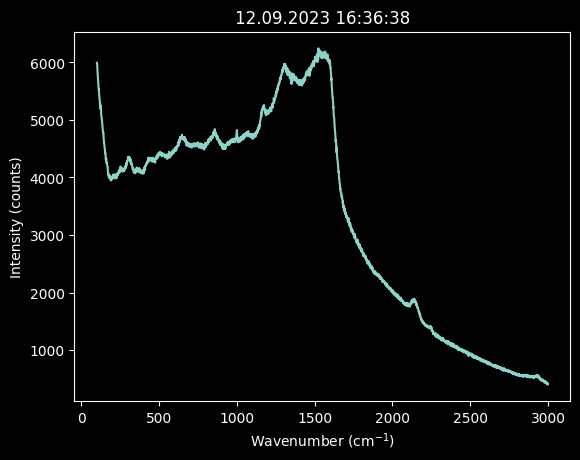

<Figure size 640x480 with 0 Axes>

In [117]:
ramans.ramans[0].plot()

In [120]:
element = ramans.ramans[0]
element.interactive(mod=True)

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

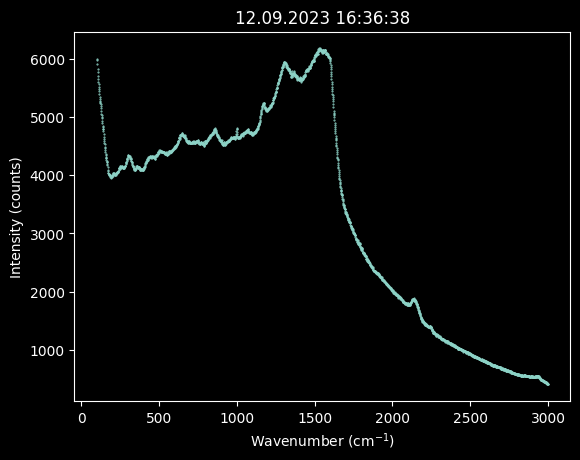

<Figure size 640x480 with 0 Axes>

In [124]:
element.sav_gol(window=10,order=5,show=True)

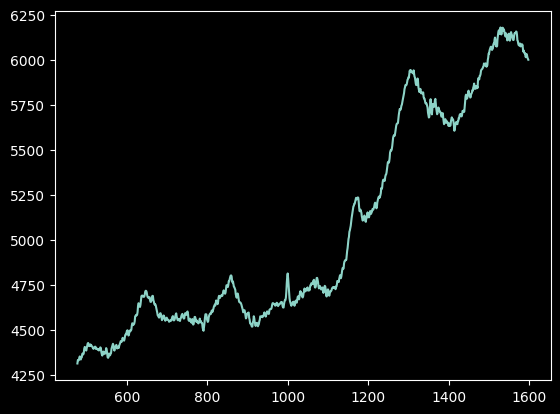

In [142]:
a = -1500
z = 300
plt.plot(element.denoisedx[z:a], element.denoisedy[z:a])

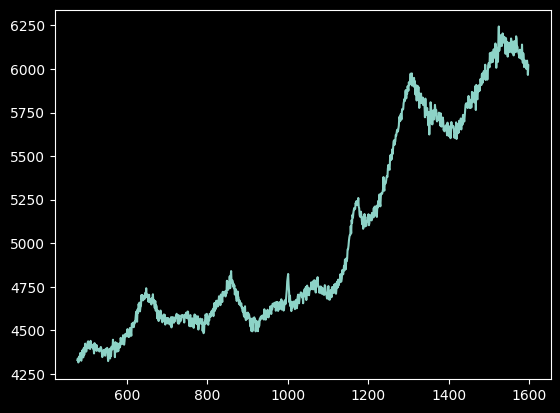

In [143]:
a = -1500
z = 300
plt.plot(element.x[z:a], element.y[z:a])

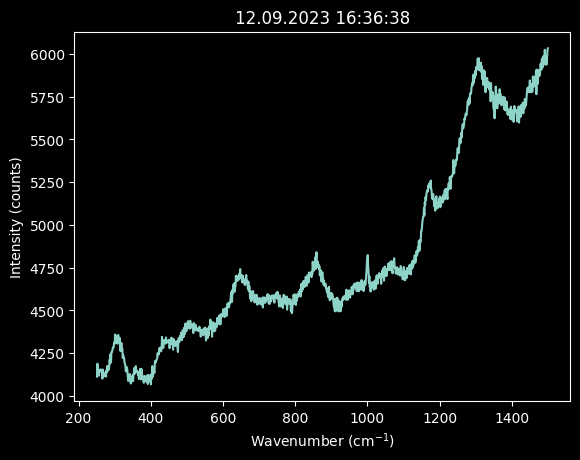

<Figure size 640x480 with 0 Axes>

In [159]:
element.crop(250,1500,show=True)

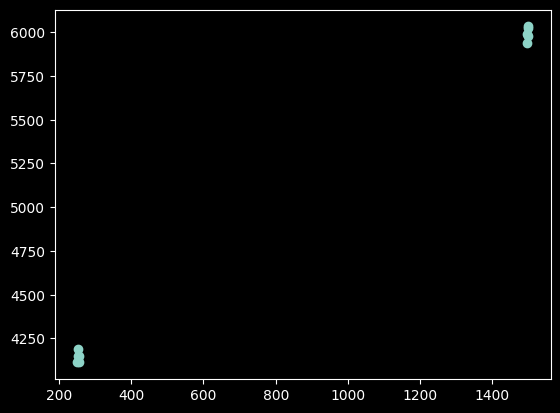

In [160]:
# Fit polynomial baseline

ap = list(element.croppedx[:5])
bp = list(element.croppedx[-5:])
xfit = ap + bp

a = list(element.croppedy[:5])
b = list(element.croppedy[-5:])
yfit = a + b

plt.plot(xfit, yfit, 'o')
# yfit = self.a + self.b
# print(type(self.denoisedx),type(self.denoisedy))
# print('The lenghts',len(xfit),len(yfit))

# coefficients = np.polyfit(xfit, yfit, degree)
# baseline = np.polyval(coefficients, self.denoisedx)

In [153]:
a

[5994.286013986014,
 5970.493473193475,
 5903.897902097905,
 5829.5692307692325,
 5765.05641025641]

In [144]:
element.baseline()

[5994.286013986014, 5970.493473193475, 5903.897902097905, 5829.5692307692325, 5765.05641025641]
[418.7146853146852, 418.2986013986012, 419.4687645687643, 418.22867132867106, 406.55034965034923]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
The lenghts 5 10


TypeError: expected x and y to have same length

In [ ]:
def baseline(self,degree = 1, show = False, before=False):
    
    # Fit polynomial baseline

    ap = self.denoisedx[:5]
    bp = self.denoisedx[-5:]

    xfit = ap + bp

    self.a = list(self.denoisedy[:5])
    self.b = list(self.denoisedy[-5:])
    
    print(self.a)
    print(self.b)

    yfit = self.a + self.b
    print(type(self.denoisedx),type(self.denoisedy))
    print('The lenghts',len(xfit),len(yfit))

    coefficients = np.polyfit(xfit, yfit, degree)
    baseline = np.polyval(coefficients, self.denoisedx)

    # Plot the original signal and the baseline
    # plt.plot(self.denoisedx, self.denoisedy, label='Original Signal')
    new_zero = abs(min(self.denoisedy - baseline))
    if before:
        plt.plot(self.denoisedx, (self.croppedy + new_zero)  , label='baselined')
        plt.plot(self.denoisedx, baseline, label='Baseline')
    else:
        plt.plot(self.denoisedx, (self.denoisedy + new_zero), label='baselined')
        plt.plot(self.denoisedx, baseline, label='Baseline')
    self.basedx = self.denoisedx
    self.basedy = (self.denoisedy + new_zero) - baseline
    # plt.plot(self.denoisedx, baseline, label='Baseline')
    plt.legend()
    plt.xlabel('wavenumber (cm$^{-1}$)')
    plt.ylabel('Intensity (counts)')

    if not os.path.exists(self.sample+'/baseline'):
        os.makedirs(self.sample+'/baseline')

    plt.title(self.metadata['Date'] + ' - Baseline')
    if show:
        plt.show()
    name = self.sample + "/baseline/{i}.png".format(i = self.metadata['Date'])
    plt.savefig(name)
    plt.clf()
